<a href="https://colab.research.google.com/github/br0kic/Pemrograman_Python/blob/main/pertemuan%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [10]:
ls

'1 Computer Architecture, Microprocessor and Microcontroller.pptx'
 3scene@
 best_weight_scene_mobileNet.h5
 Classroom/
 coast_art294.jpg
 dataset@
 DATASET@
'Getting started.pdf'
 GMB_11@
 Maraden_quizz.pdf
 nnmodel_scene/
 nomer1.pdf
 nomer2.pdf
 nomer3.pdf
 quiz_jarkomdat_maraden.pdf
'Untitled folder'/


In [35]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [36]:

# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("DATASET")
data = []
labels = []

[INFO] loading images...


In [37]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((256, 256))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [38]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [39]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [40]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [41]:

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(347, 256, 256, 3)
(116, 256, 256, 3)


In [42]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6150500   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [43]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(256*256*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 196608)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               19660900  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 19,662,873
Trainable params: 19,662,873
Non-trainable params: 0
_________________________________________________________________


In [45]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [46]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
11/11 [==============================] - 10s 947ms/step - loss: 8.2319 - accuracy: 0.2161 - val_loss: 2.6461 - val_accuracy: 0.2845
Epoch 2/25
11/11 [==============================] - 10s 924ms/step - loss: 1.8403 - accuracy: 0.3084 - val_loss: 1.5346 - val_accuracy: 0.3534
Epoch 3/25
11/11 [==============================] - 10s 933ms/step - loss: 1.3981 - accuracy: 0.4323 - val_loss: 1.5179 - val_accuracy: 0.3621
Epoch 4/25
11/11 [==============================] - 10s 931ms/step - loss: 1.2028 - accuracy: 0.4986 - val_loss: 1.3014 - val_accuracy: 0.4828
Epoch 5/25
11/11 [==============================] - 10s 930ms/step - loss: 1.0431 - accuracy: 0.6369 - val_loss: 1.1999 - val_accuracy: 0.5086
Epoch 6/25
11/11 [==============================] - 10s 929ms/step - loss: 0.8891 - accuracy: 0.6916 - val_loss: 1.0918 - val_accuracy: 0.5948
Epoch 7/25
11/11 [==============================] - 10s 930ms/step - loss: 0.7522 - accuracy: 0.7608 - val_loss: 1.0038 - val_accuracy: 0.5862

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


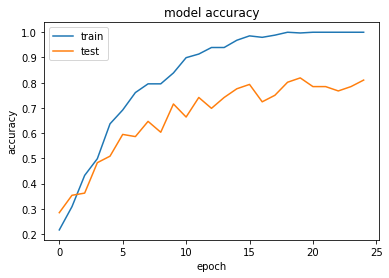

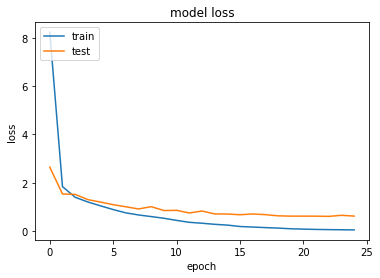

In [47]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_06       0.70      0.82      0.75        28
      GMB_07       0.78      0.89      0.83        28
      GMB_08       0.91      0.78      0.84        27
      GMB_09       0.93      0.82      0.87        17
      GMB_10       0.85      0.69      0.76        16

    accuracy                           0.81       116
   macro avg       0.83      0.80      0.81       116
weighted avg       0.82      0.81      0.81       116



In [50]:

model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets
